In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [2]:
for dirname, _, filenames in os.walk('/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_17.csv
/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_20.csv
/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_16.csv
/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/teams_and_leagues.csv
/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_15.csv
/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_18.csv
/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_19.csv


In [3]:
#Funkcja, którą zaczerpnęliśmy z internetu, pozwala narysować słupkowe wykresy zliczające ilość graczy z datasetu
#posiadających daną statystyke na konkretnym poziomie
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):  #argumentami funkcji są kolejno: dataset, ilość
    nunique = df.nunique()                                     #wykresów, ilość wykresów w rzędzie
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Funkcja zaczerpnięta z internetu, pozwala narysować wykres przedstawiający jak poszczególne statystyki wpływają
# na siebie
def plotCorrelationMatrix(df, graphWidth): #argumentami są: dataset i szerokość grafu
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
nRowsRead = 14000  # Ustalamy tu ile rekordów z całego datasetu będzie brane pod uwagę
fifa15 = pd.read_csv('/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_15.csv', delimiter=',', nrows = nRowsRead)
fifa15.dataframeName = 'players_15.csv'
nRow, nCol = fifa15.shape
print(f'Jest {nRow} rzędów i {nCol} kolumn')

nRowsRead = 14000 # Ustalamy tu ile rekordów z całego datasetu będzie brane pod uwagę
fifa16 = pd.read_csv('/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_16.csv', delimiter=',', nrows = nRowsRead)
fifa16.dataframeName = 'players_16.csv'
nRow, nCol = fifa16.shape
print(f'Jest {nRow} rzędów i {nCol} kolumn')

nRowsRead = 14000 # Ustalamy tu ile rekordów z całego datasetu będzie brane pod uwagę
fifa17 = pd.read_csv('/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_17.csv', delimiter=',', nrows = nRowsRead)
fifa17.dataframeName = 'players_17.csv'
nRow, nCol = fifa17.shape
print(f'Jest {nRow} rzędów i {nCol} kolumn')

nRowsRead = 14000 # Ustalamy tu ile rekordów z całego datasetu będzie brane pod uwagę
fifa18 = pd.read_csv('/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_18.csv', delimiter=',', nrows = nRowsRead)
fifa18.dataframeName = 'players_18.csv'
nRow, nCol = fifa18.shape
print(f'Jest {nRow} rzędów i {nCol} kolumn')

nRowsRead = 14000 # Ustalamy tu ile rekordów z całego datasetu będzie brane pod uwagę
fifa19 = pd.read_csv('/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_19.csv', delimiter=',', nrows = nRowsRead)
fifa19.dataframeName = 'players_19.csv'
nRow, nCol = fifa19.shape
print(f'Jest {nRow} rzędów i {nCol} kolumn')

nRowsRead = 14000 # Ustalamy tu ile rekordów z całego datasetu będzie brane pod uwagę
fifa20 = pd.read_csv('/home/igor/Dokumenty/projektmispxdd/fifa-20-complete-player-dataset/players_20.csv', delimiter=',', nrows = nRowsRead)
fifa20.dataframeName = 'players_20.csv'
nRow, nCol = fifa20.shape
print(f'Jest {nRow} rzędów i {nCol} kolumn')

Jest 14000 rzędów i 104 kolumn
Jest 14000 rzędów i 104 kolumn
Jest 14000 rzędów i 104 kolumn
Jest 14000 rzędów i 104 kolumn
Jest 14000 rzędów i 104 kolumn
Jest 14000 rzędów i 104 kolumn


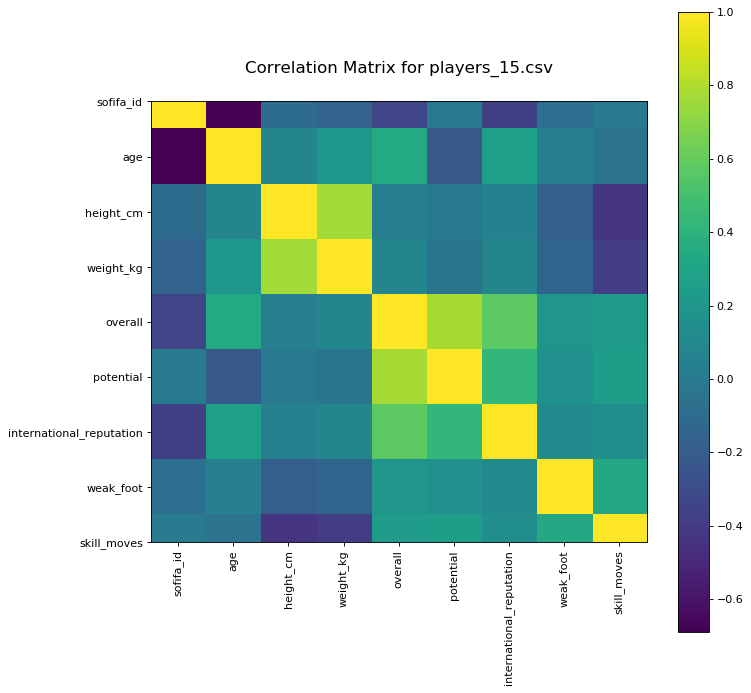

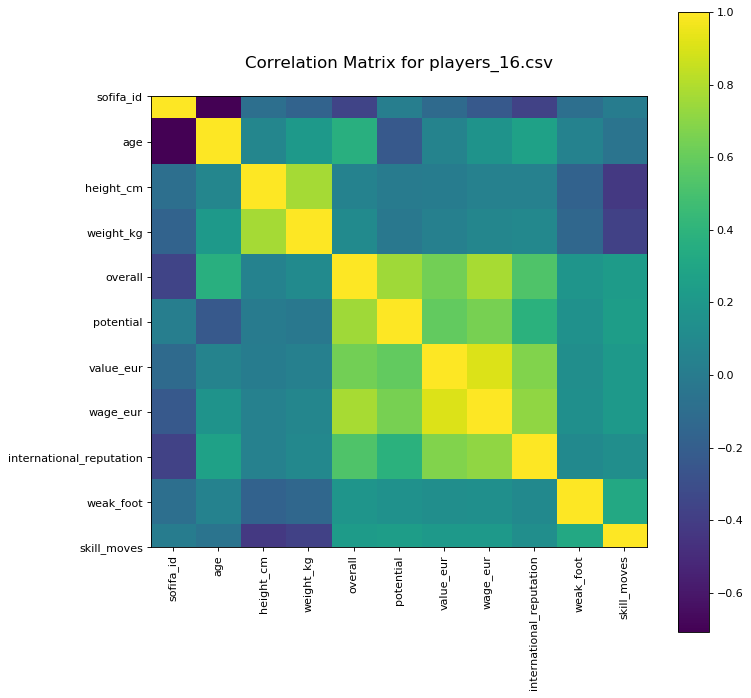

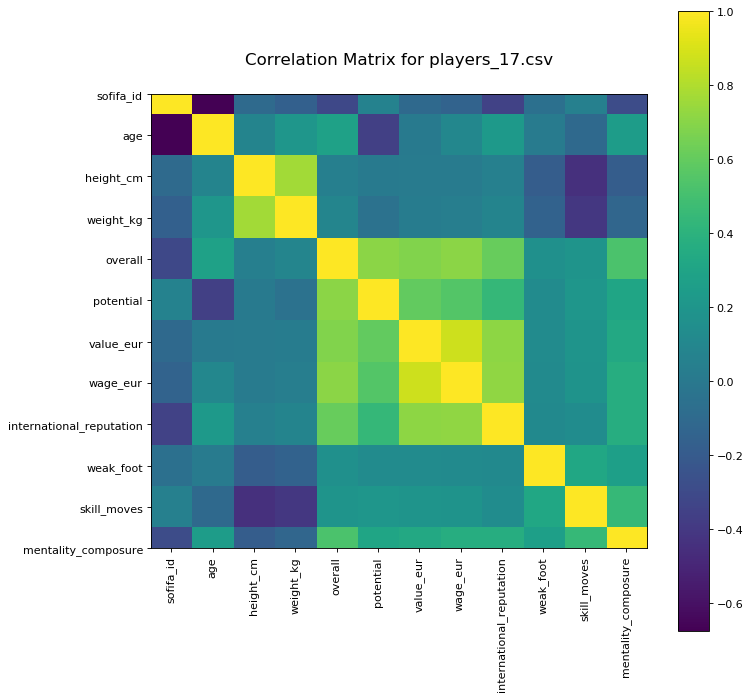

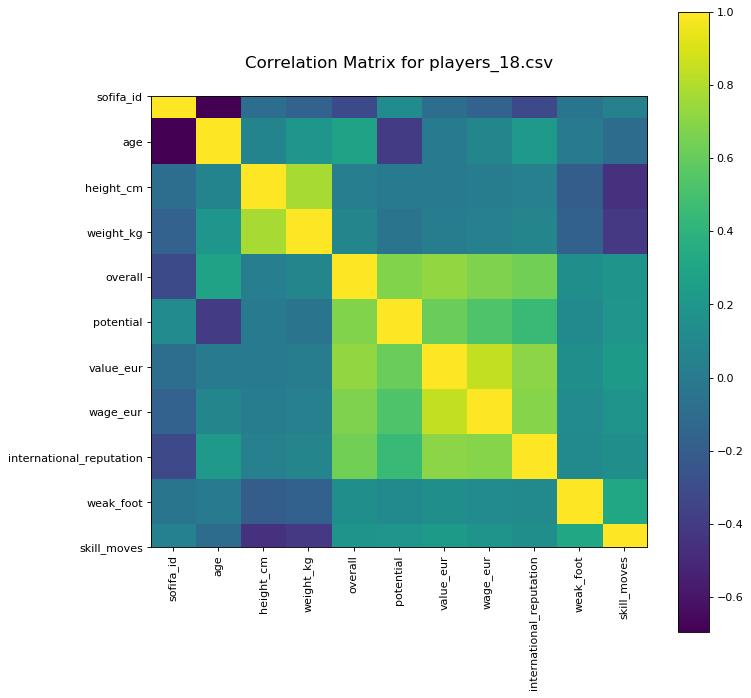

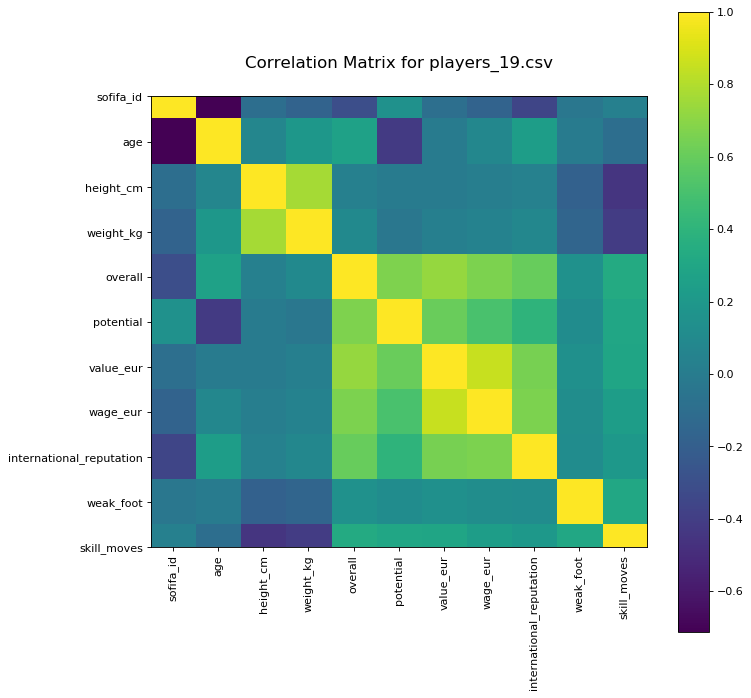

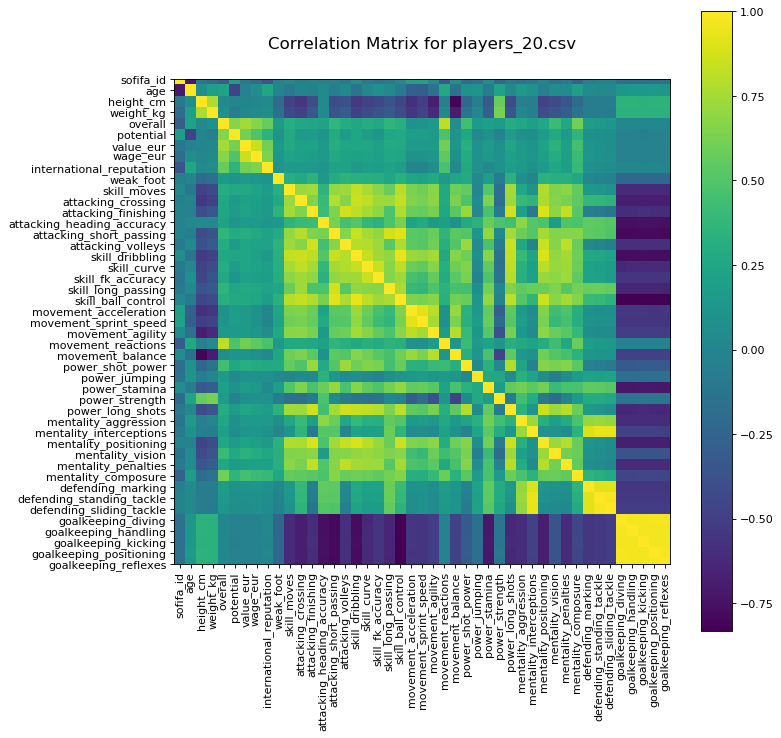

In [6]:
plotCorrelationMatrix(fifa15, 10)
plotCorrelationMatrix(fifa16, 10)
plotCorrelationMatrix(fifa17, 10)
plotCorrelationMatrix(fifa18, 10)
plotCorrelationMatrix(fifa19, 10)
plotCorrelationMatrix(fifa20, 10)

Fifa 15: 


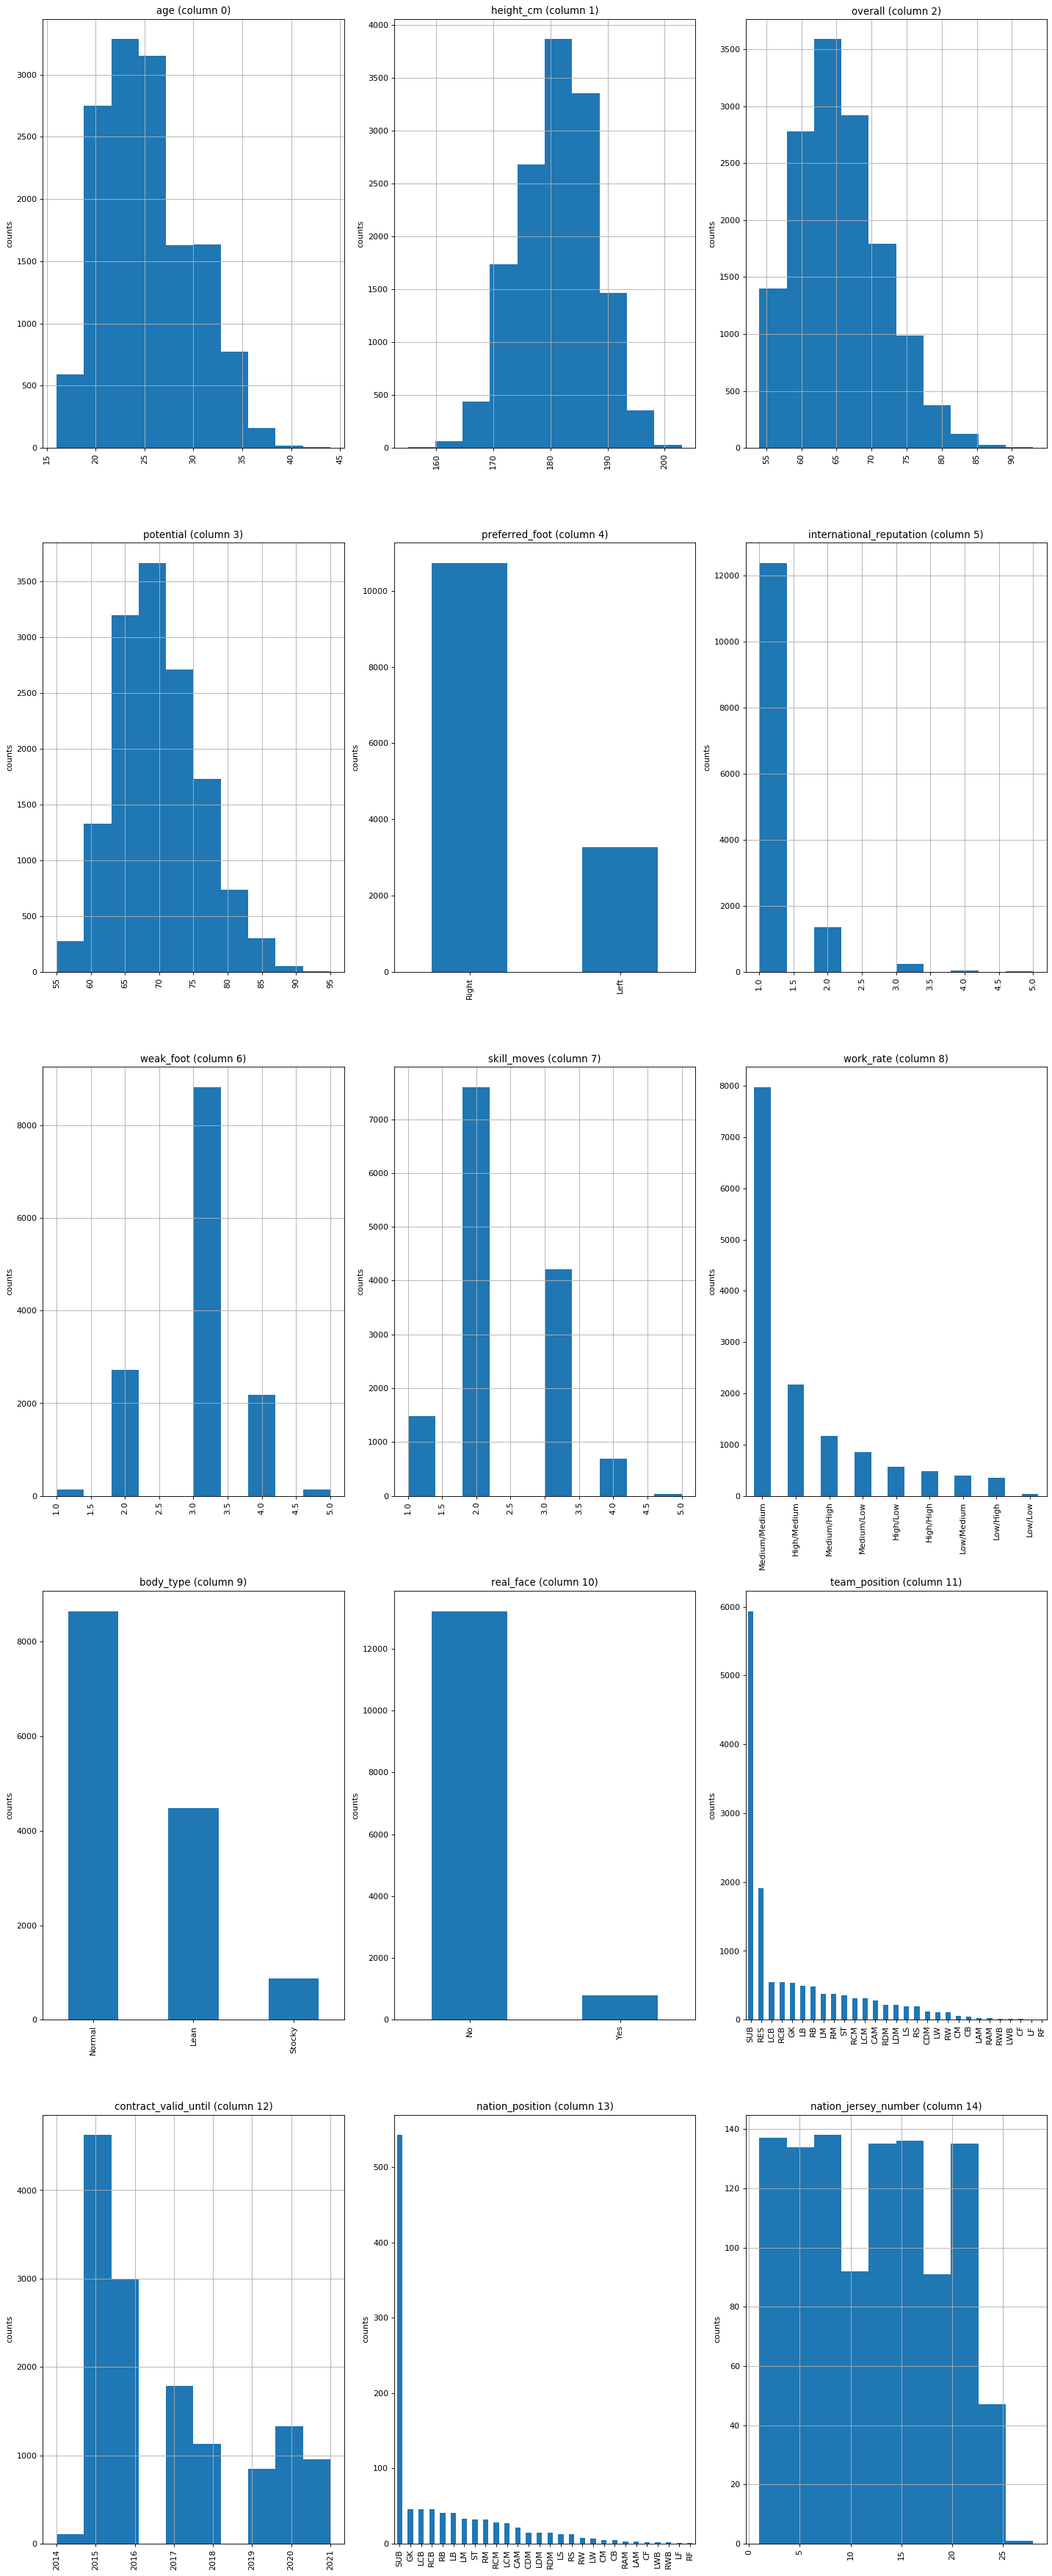

Fifa 16: 


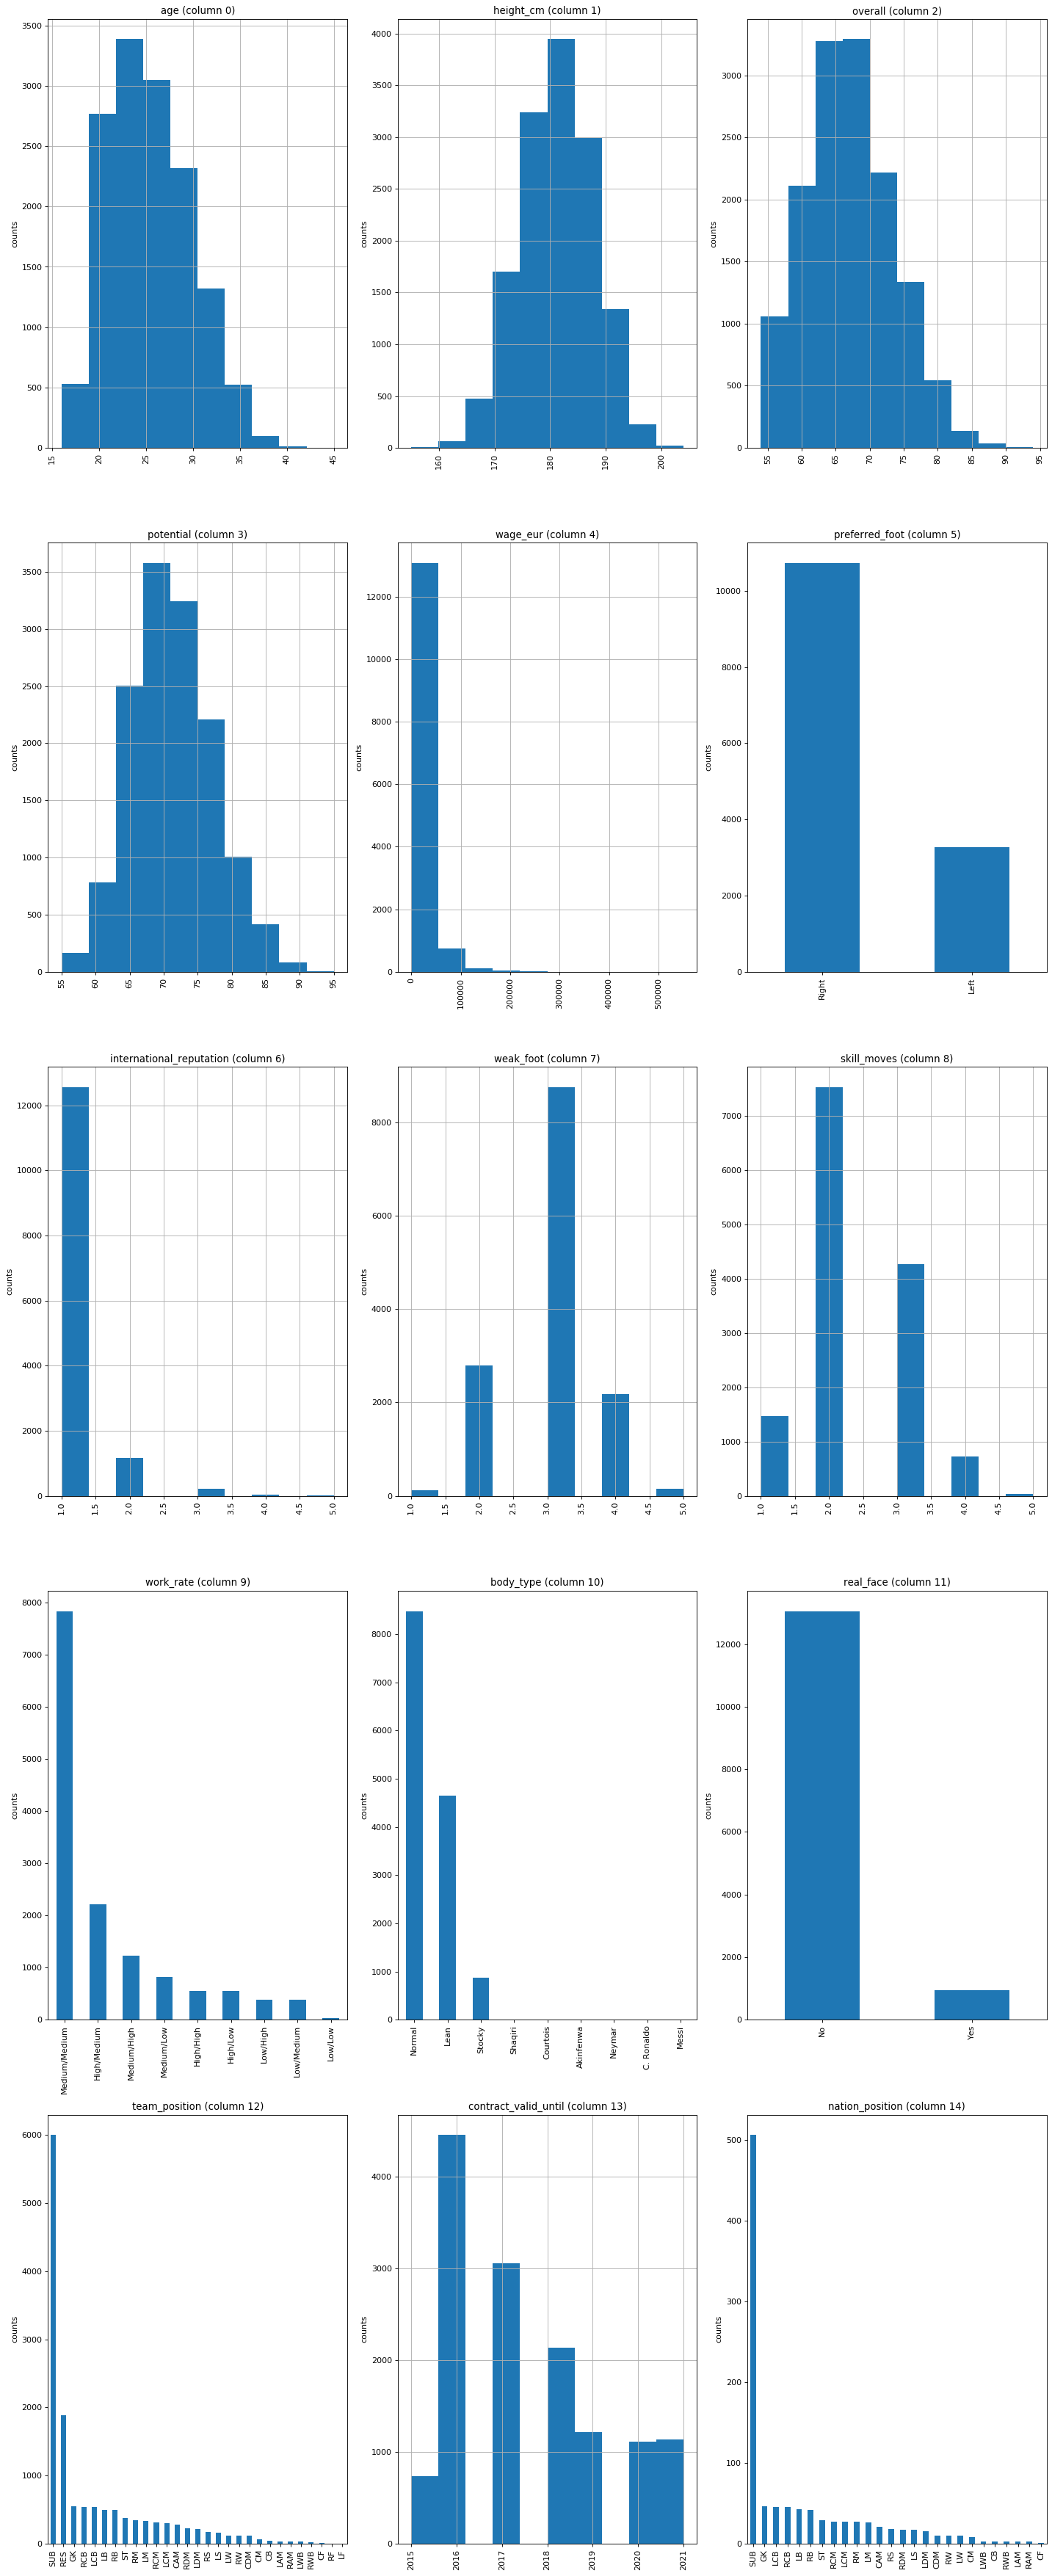

Fifa 17: 


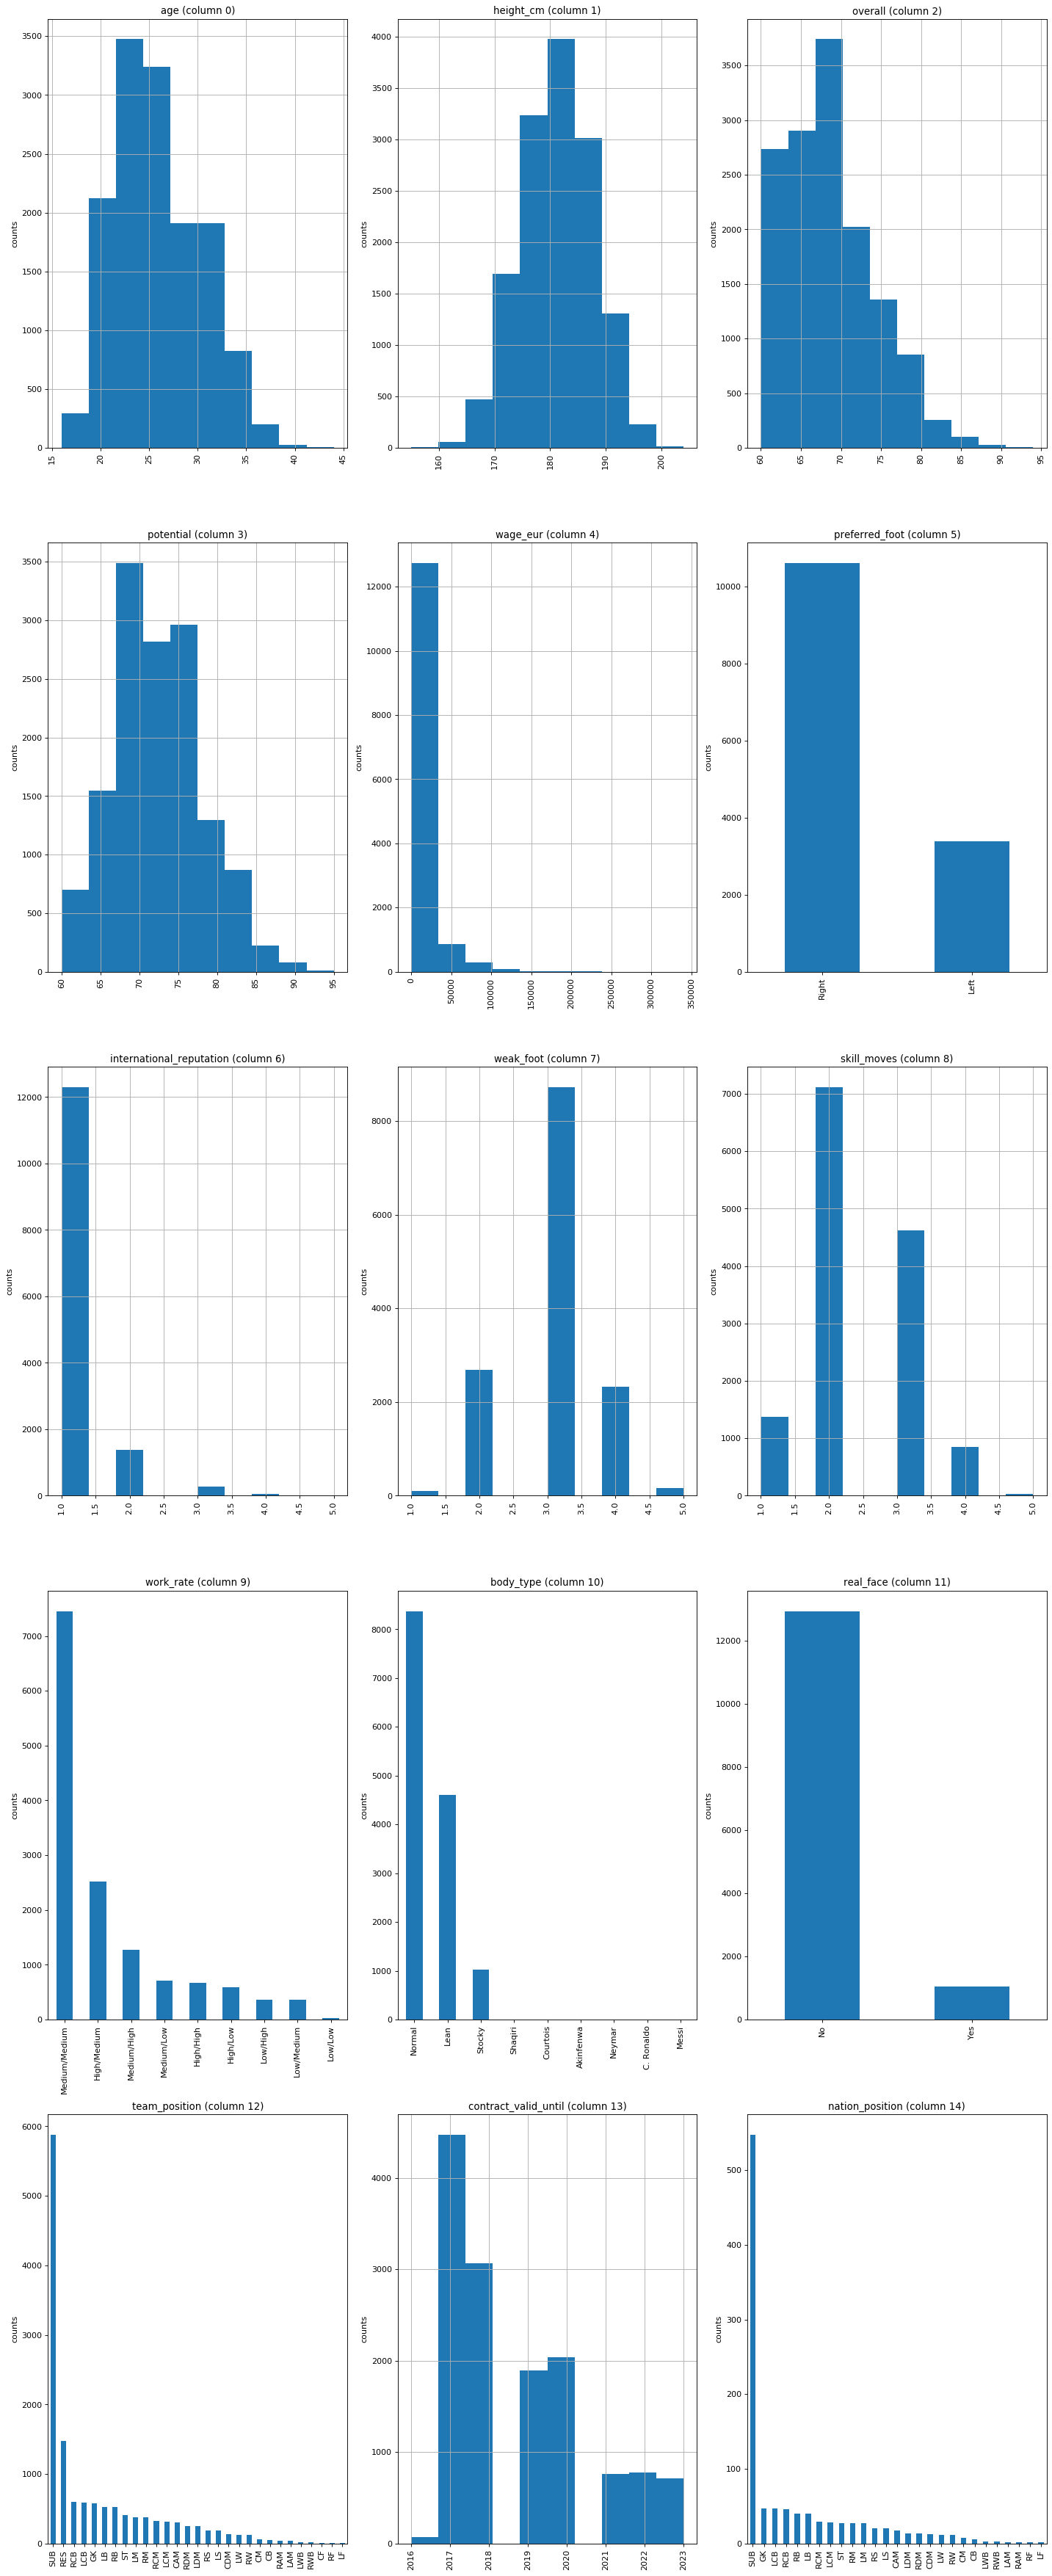

Fifa 18: 


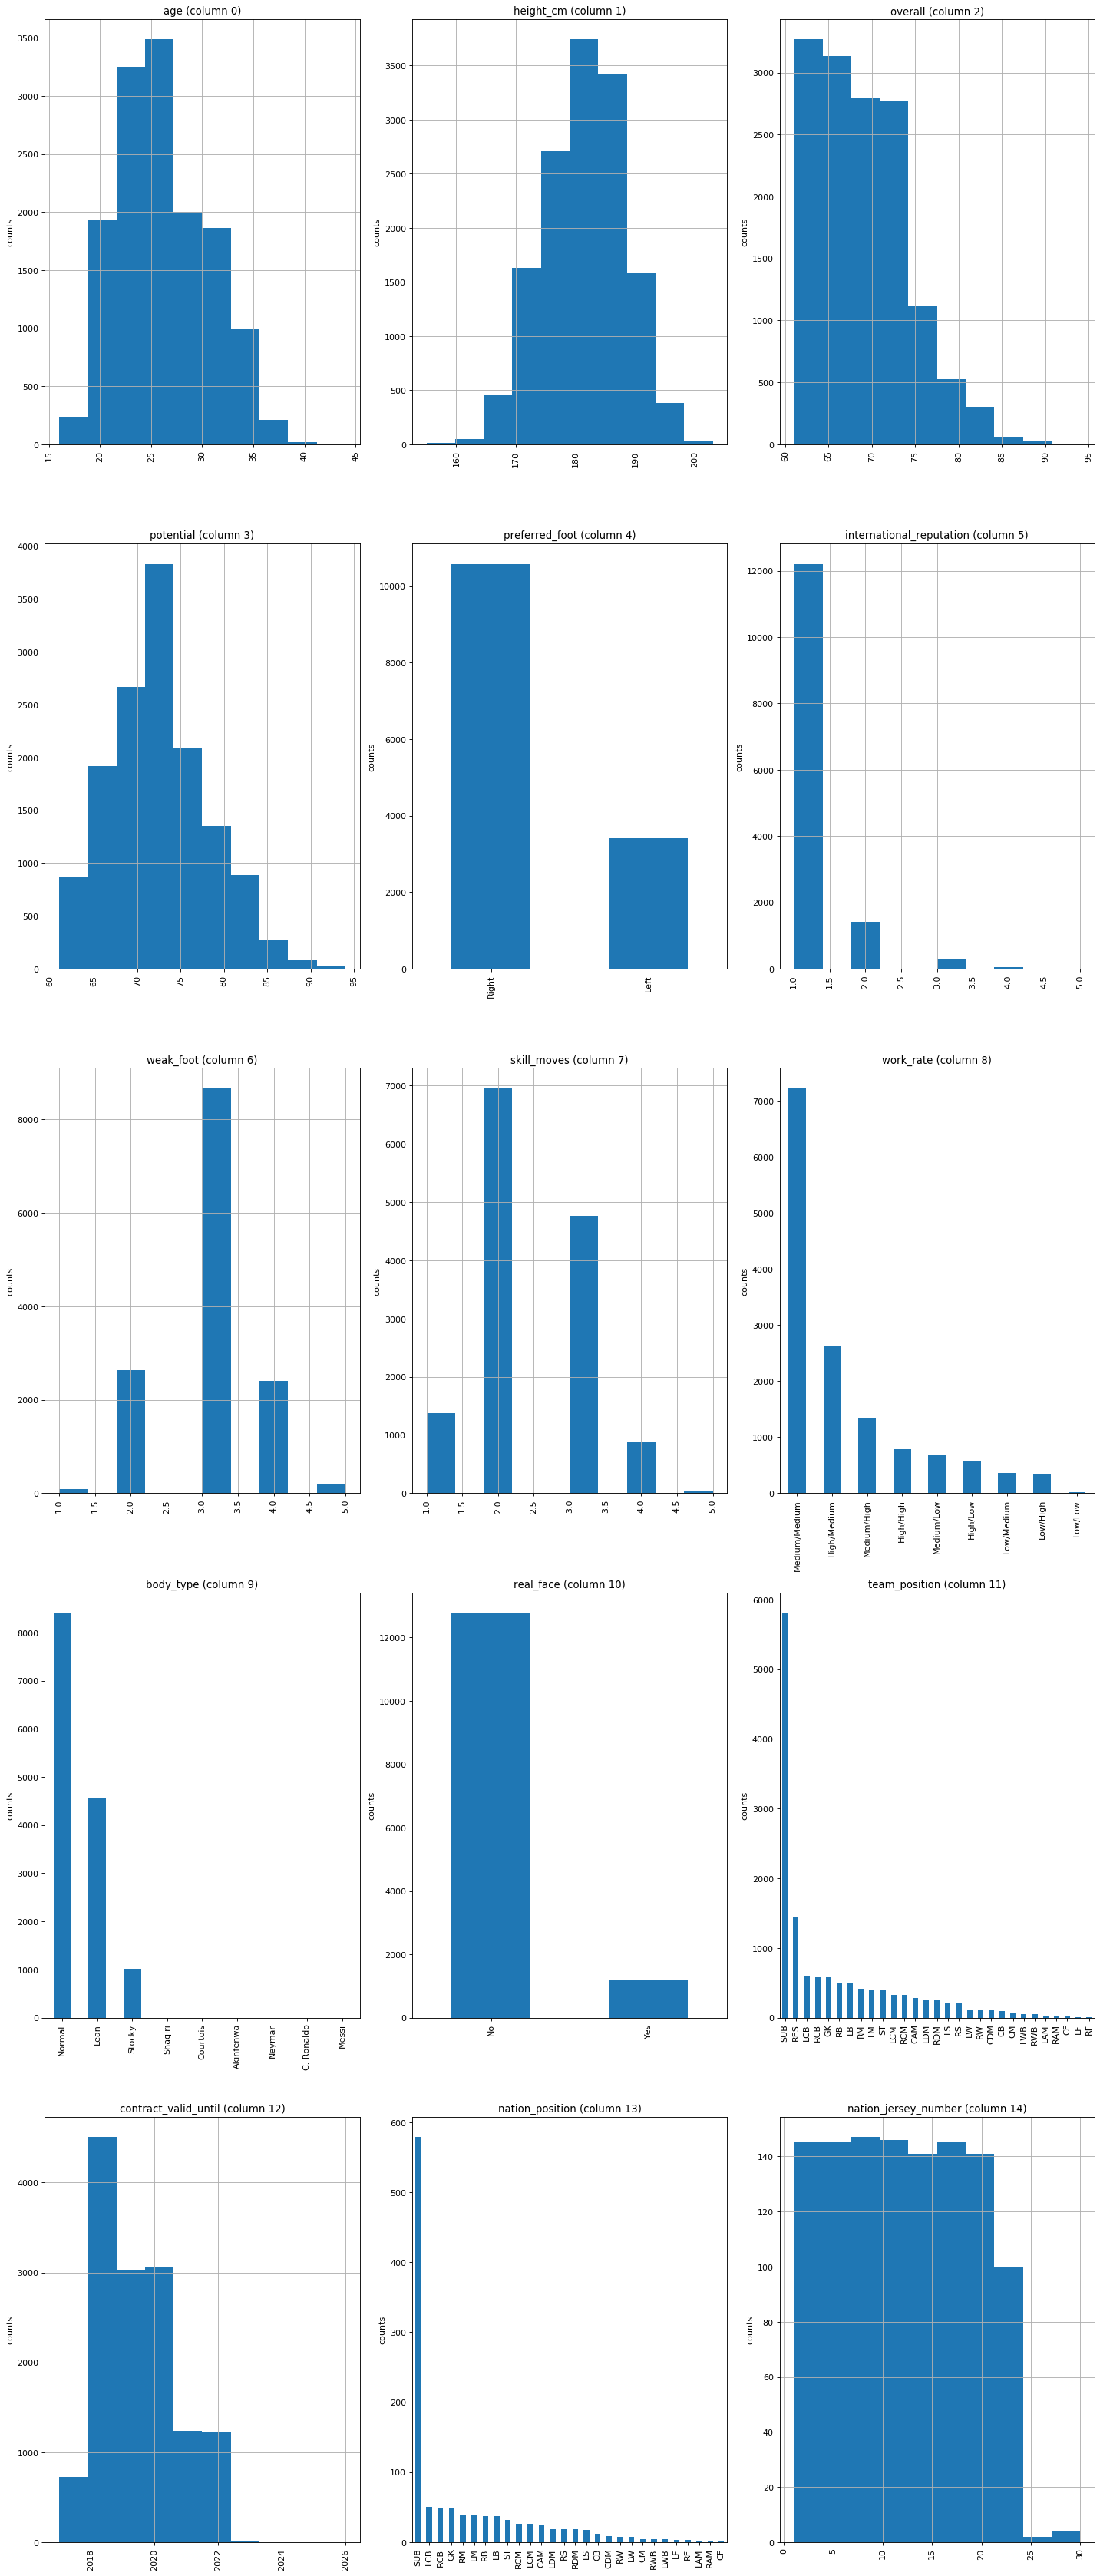

Fifa 19: 


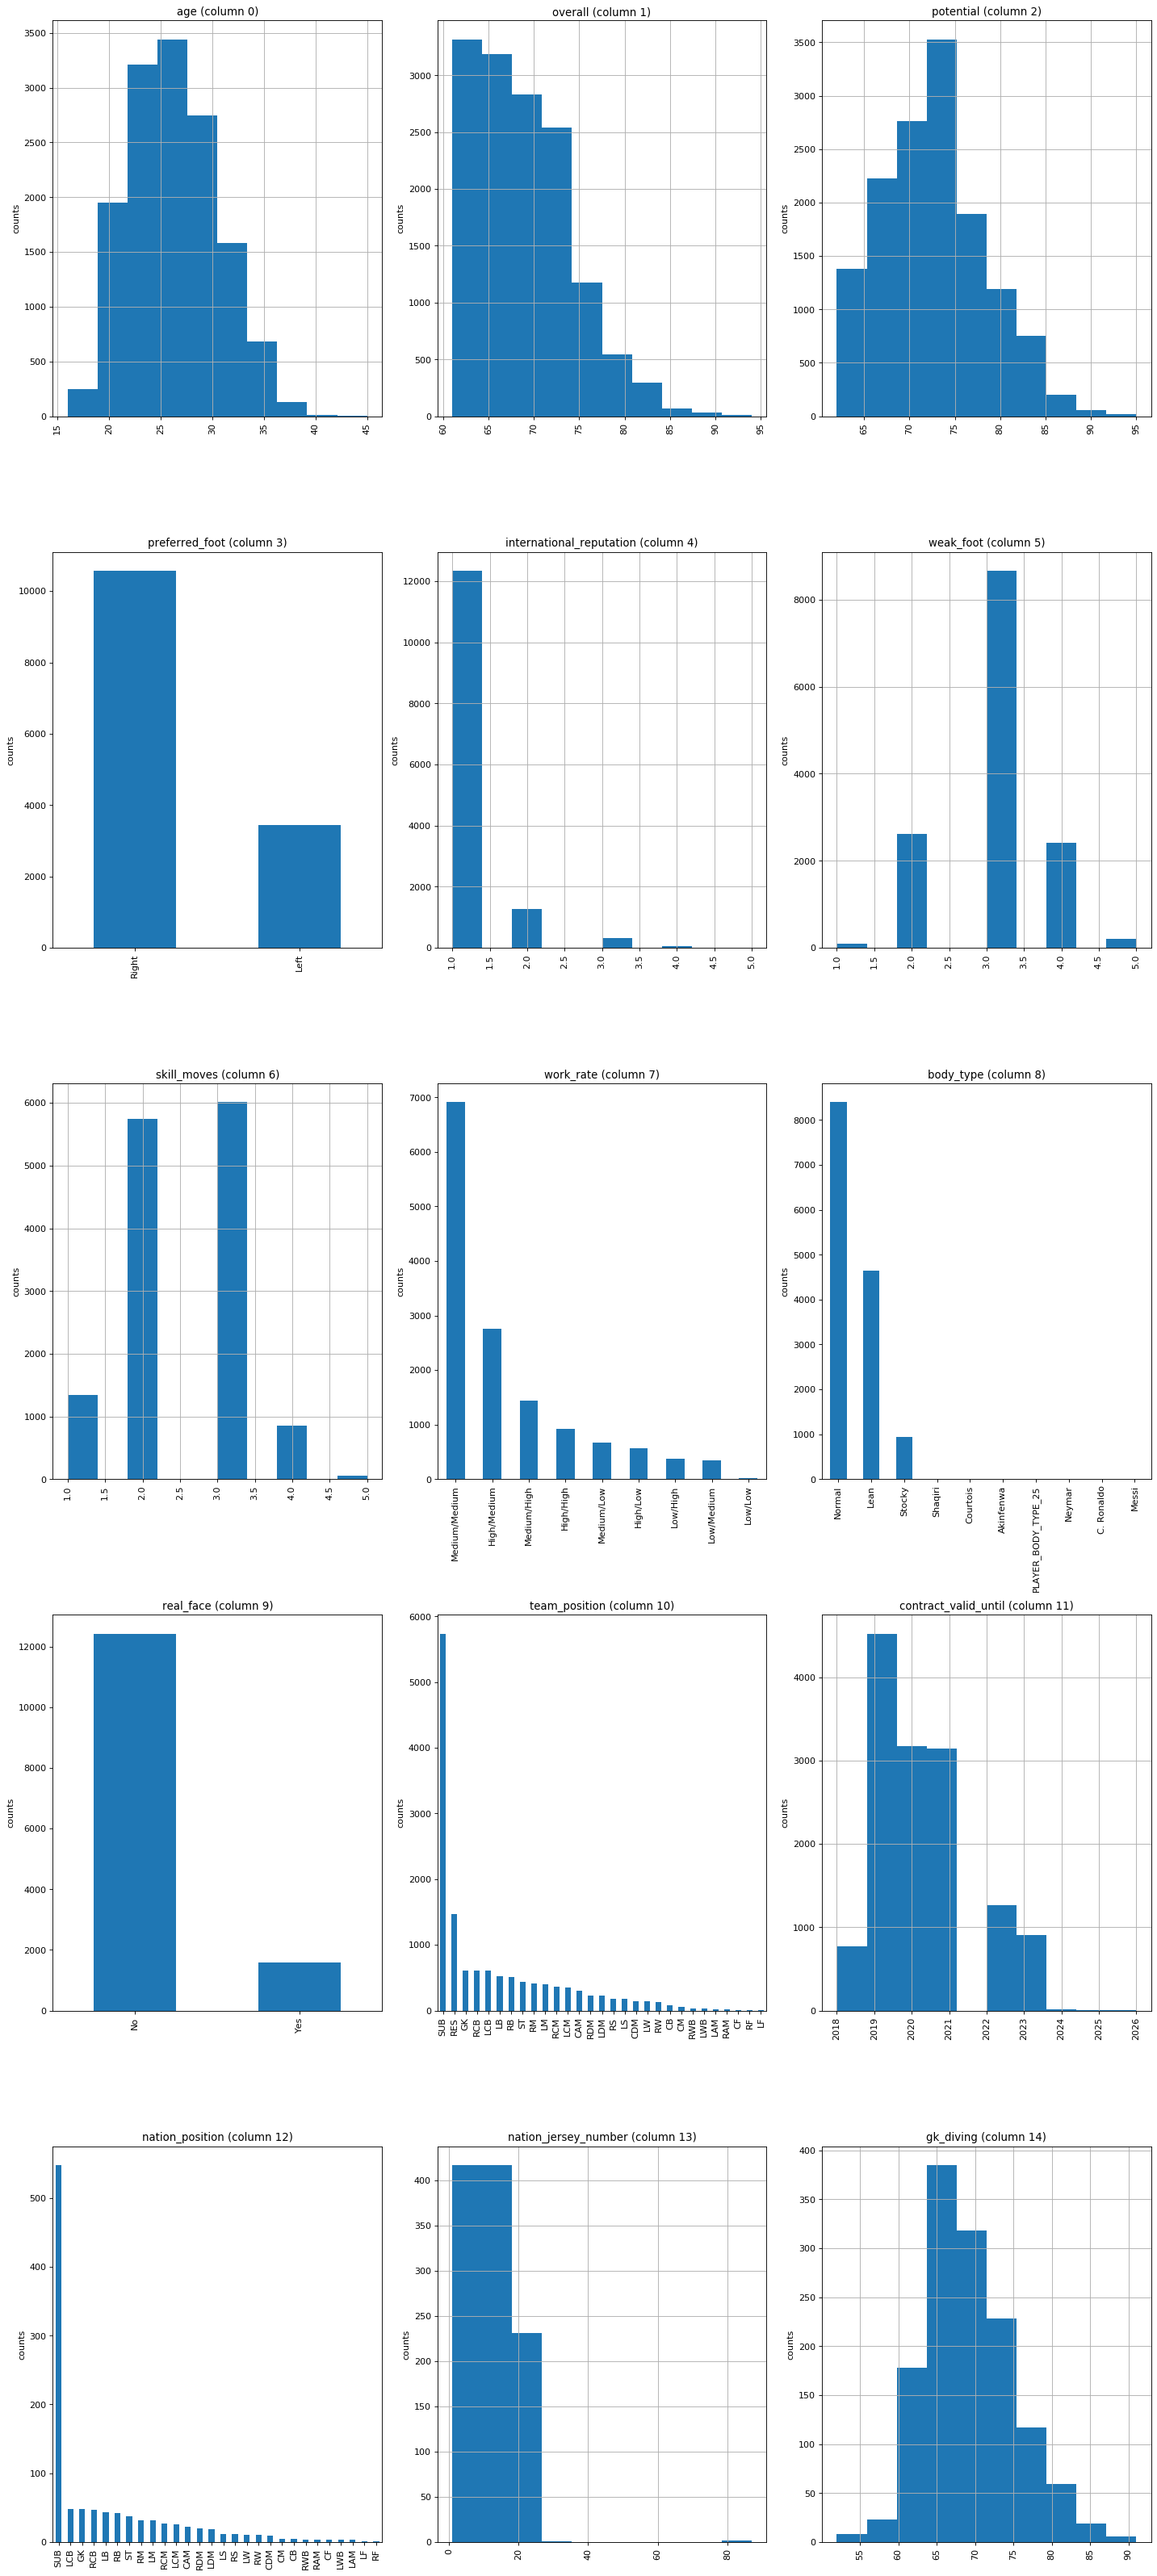

Fifa 20: 


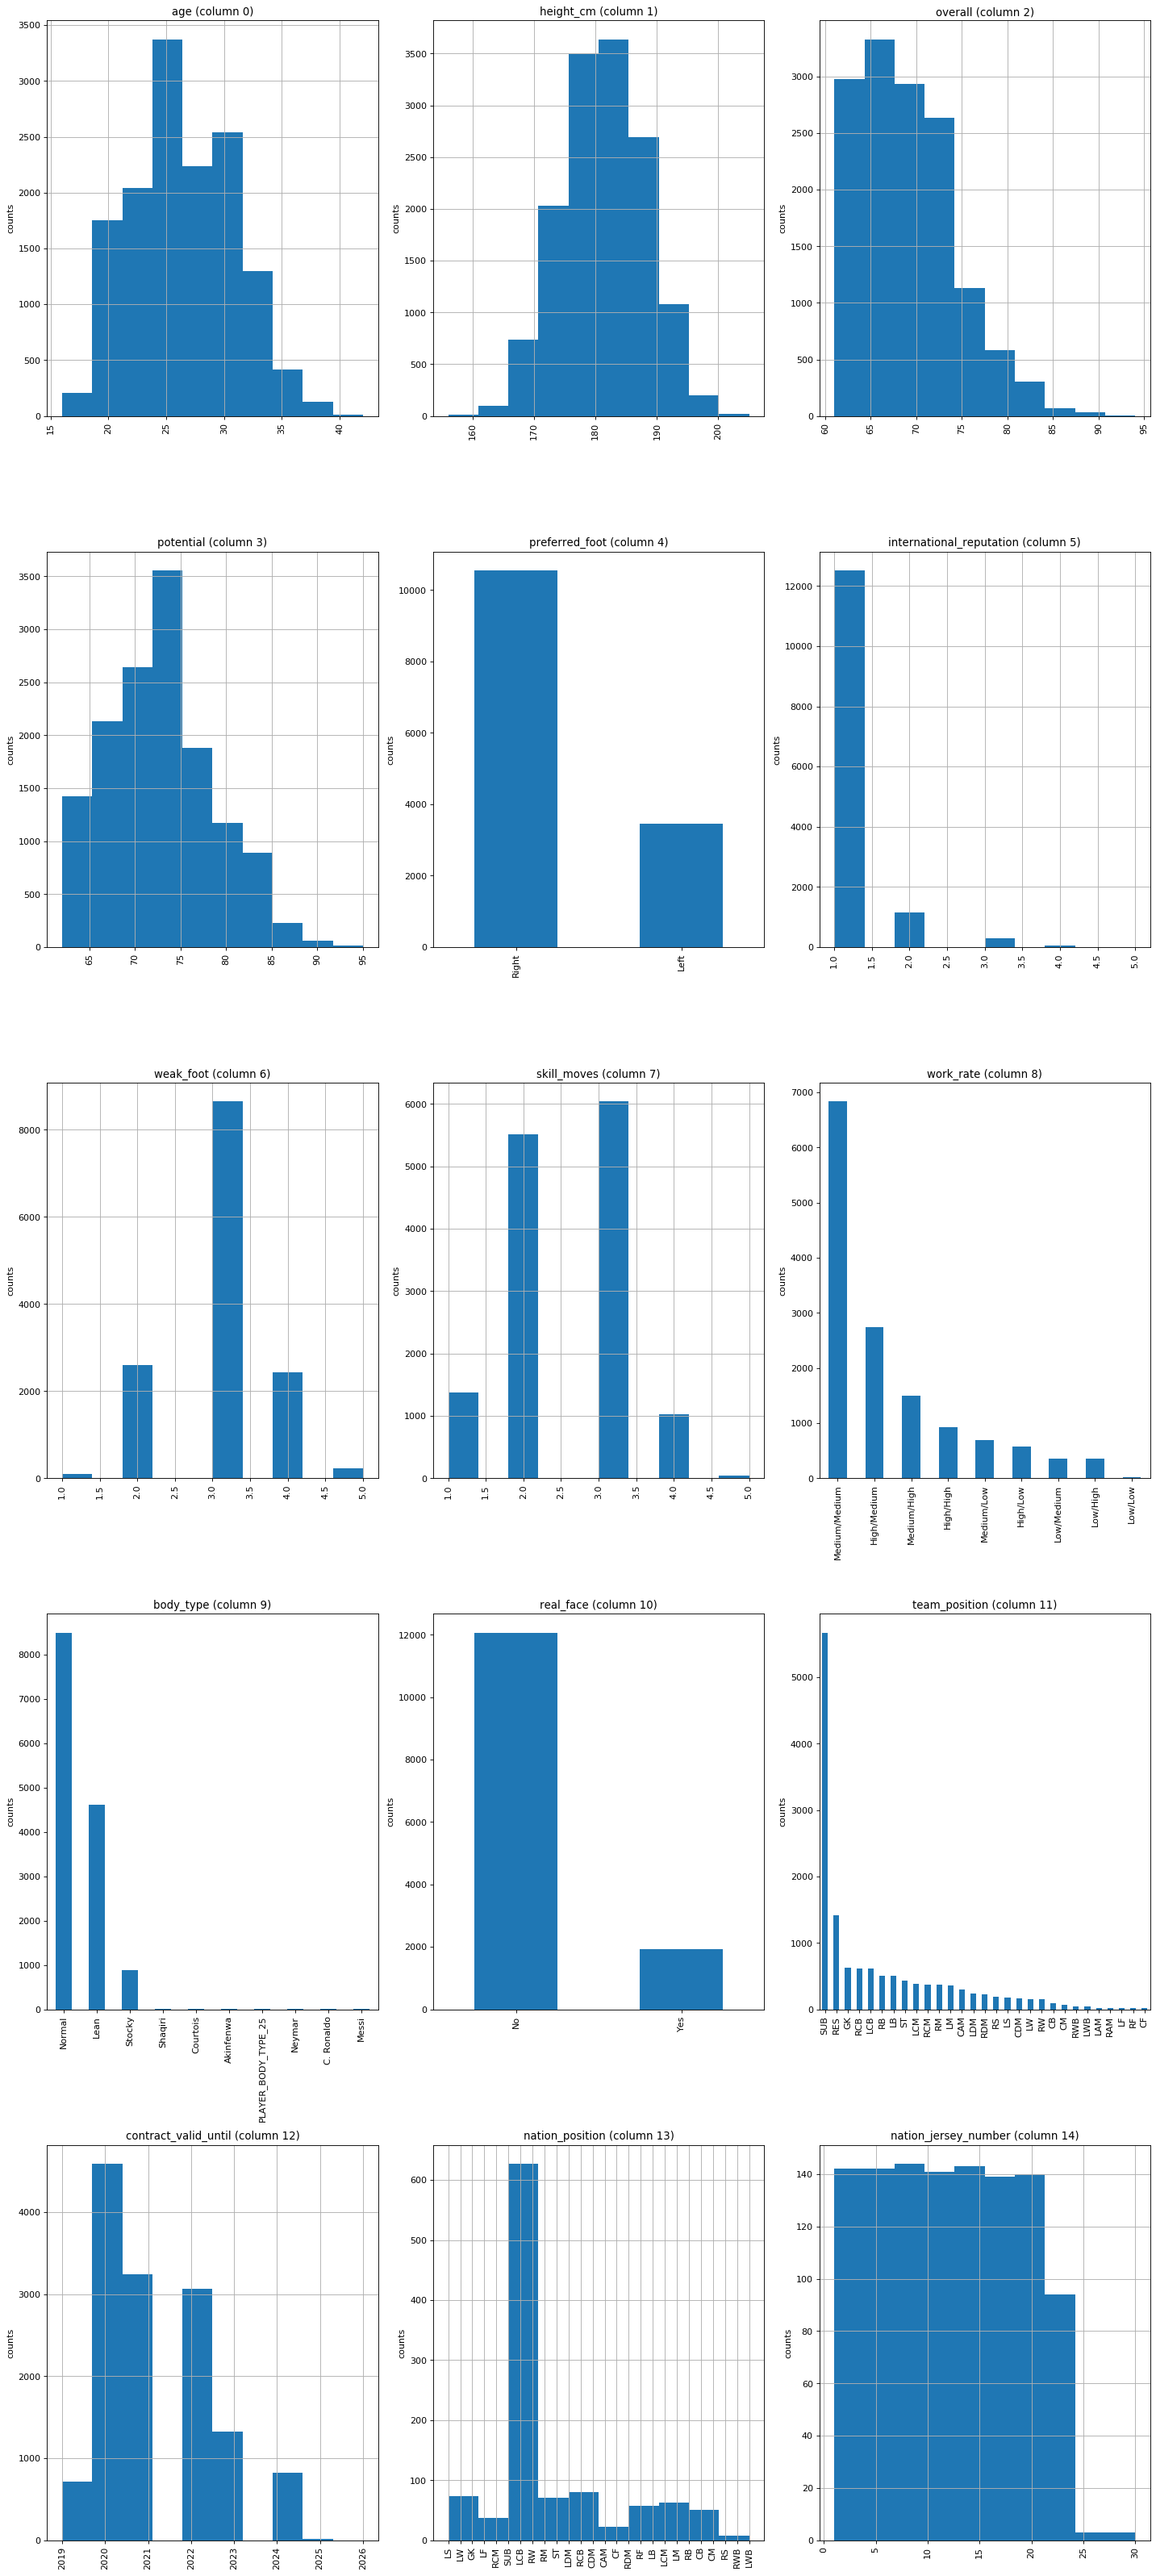

In [7]:
print ('Fifa 15: ')
plotPerColumnDistribution(fifa15,15,3)
print ('Fifa 16: ')
plotPerColumnDistribution(fifa16,15,3)
print ('Fifa 17: ')
plotPerColumnDistribution(fifa17,15,3)
print ('Fifa 18: ')
plotPerColumnDistribution(fifa18,15,3)
print ('Fifa 19: ')
plotPerColumnDistribution(fifa19,15,3)
print ('Fifa 20: ')
plotPerColumnDistribution(fifa20,15,3)